In [2]:
import pandas as pd 

df = pd.read_csv('./data/vehicle_prod.csv')
df = df.rename(columns={'Unnamed: 0': 'country'})

df = df.set_index('country', inplace=True)


df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
df



,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [16]:
df[['2007']] #1차원 배열
#df[['2007']] #2차원 배열로 만들기

,2007
China,7.71
EU,19.02
US,10.47
Japan,10.87
Korea,4.04
Mexico,2.01


In [17]:
df.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [18]:
df['2007'].tolist() # list로 바꾸기

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

In [19]:
df.describe()

,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


In [20]:
df.corr() #상관관게 유사도
#음의 상관 : 서로반대방향
#양의상관 : 서로 같은 방향으로 변화

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [21]:
#2007~2011 생산량 데이터 total_production 컬럼 생성

column_list = df.columns.tolist()


#year_columns = ['2007', '2008', '2009', '2010', '2011']


# 각 행의 합계를 계산해서 새 컬럼에 저장
#df['total_production'] = df[column_list].sum(axis=1)

#df.loc["total_production"]=df[column_list].sum(axis=0)
#df

df['total_production'] = df.sum(axis=1,numeric_only=True)
df.loc['total'] = df.sum(numeric_only=True)
df

,2007,2008,2009,2010,2011,total_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
total,54.12,50.77,45.04,55.68,57.25,262.86


In [22]:
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

#데이터프레임 생성
store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se
})

store_df

#순수입 컬럼 추가하기

,월,수입,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


In [23]:
#df.insert(loc=4, column='profit', value=df['income_se']-df['expense_se'])
store_df['순수입'] = store_df['수입'] - store_df['지출']
store_df

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


<Axes: >

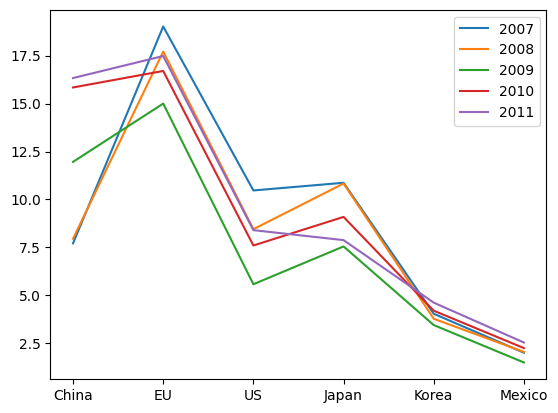

In [24]:
df = pd.read_csv('./data/vehicle_prod.csv')
df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
df

df.plot.line()

<Axes: >

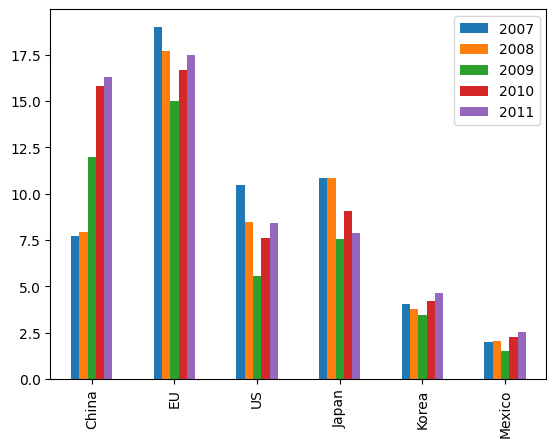

In [25]:
df.plot.bar()

Text(0.5, 0, 'Country')

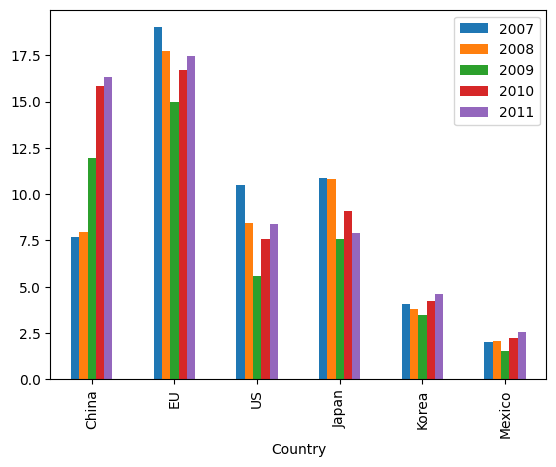

In [123]:
ax =df.plot.bar()
ax.set_xlabel('Country')

In [14]:
ax.set_ylabel('Production')

NameError: name 'ax' is not defined

<Axes: >

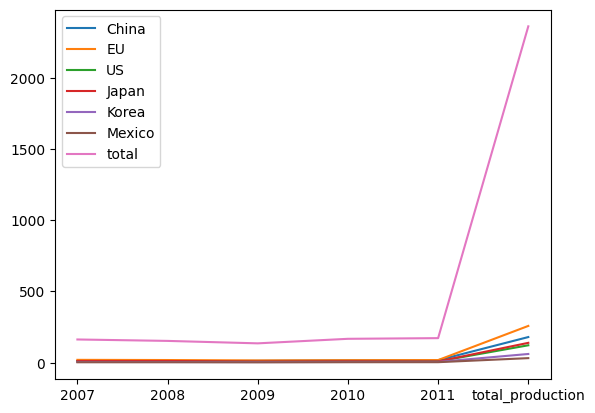

In [13]:
df_year = df.transpose()
df_year.plot.line()

In [ ]:
#결측치 nan, pd
import pandas as pd 


In [150]:
import pandas as pd
import numpy as np

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
    }

df = pd.DataFrame(data)

In [142]:
df.isnull()

,name,age,score,city
0,False,False,False,False
1,False,True,False,False
2,False,False,True,True
3,False,False,False,False
4,False,True,False,False


In [143]:
df.isnull().sum()

name     0
age      2
score    1
city     1
dtype: int64

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [147]:
#결측치 제거
df.dropna()#na 값을 날린다

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [152]:
df.dropna(axis=1) # 열전체 제거

,name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


In [155]:
df.dropna(subset=['score']) #score 데이터의 NA가 있는 인덱스를 날리기

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [156]:
df.dropna(subset=['age'])

,name,age,score,city
0,Alice,25.0,90.0,Seoul
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon


In [160]:
#체우기

df.fillna(0)


,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [161]:
#수치형 변수의 경우는 대표값 : 평균, 중앙값, 최빈값

In [162]:
df['age'].mean()

np.float64(25.666666666666668)

In [163]:
df['age'].median()

np.float64(25.0)

In [166]:
df['age'].mode()

0    22.0
1    25.0
2    30.0
Name: age, dtype: float64

In [167]:
df['age'].mode().iloc[0]


np.float64(22.0)

In [169]:
df['age'].fillna(df['age'].mode().iloc[0])

0    25.0
1    22.0
2    30.0
3    22.0
4    22.0
Name: age, dtype: float64

In [172]:
# 직전값 ffill, 직후값
df['score'].fillna(method='ffill')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4984\1506438538.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['score'].fillna(method='ffill')


0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [175]:
df['score'].ffill() # 직전 값으로 채우기

0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [179]:
df['age'].mask(df['age']<30, 30) # 컬럼의 값에 조건을 주어, 대체할떄 사용

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [ ]:
titanic_df=pd.read_csv('./data/titanic.csv')
titanic_df.isna().sum()


In [202]:
#titanic_df['age'].mask(df['age'].isna(),  df['age'].midian())


# 결측치가 있는지 확인
titanic_df['Age'] = titanic_df['Age'].mask(
    titanic_df['Age'].isna(),
    titanic_df['Age'].median()
)

titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [206]:
titanic_df['Age'].mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

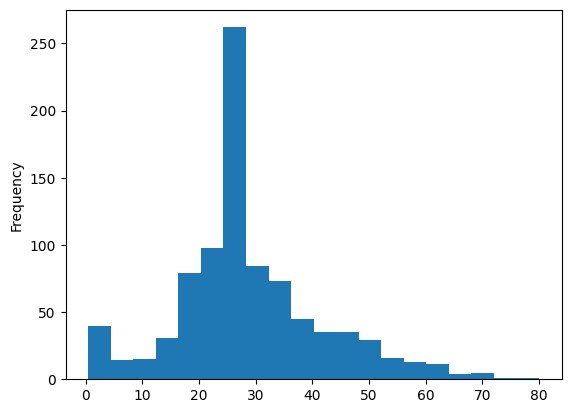

In [209]:
titanic_df["Age"].plot(kind='hist', bins=20)

In [221]:
#cabin=unknown
#titanic_df["cabin"].fillna("unknown", inplace=True)
titanic_df["Cabin"] = titanic_df["Cabin"].fillna("unknown")



titanic_df['Cabin'].value_counts().head(5)
titanic_df['Embarked'].value_counts().head()
#Embarked 최빈값으로 채우기

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [222]:
titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode(0))

In [3]:
card_df=pd.read_csv('./data/CARD_SUBWAY_MONTH_202102.csv')

card_df
#총몇건인지 코드로 확인
#평균, 표준편차, 사분위수 등 주요 통계 지표를 확인하세요
#몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
#‘노선명’ 컬럼이 가지고 있는 데이터의 종류를 확인하세요
# 2호선만 선택하세요
# '승차총승객수가 50000이상인로우의 역명을 출력하시오
# 전체중 10개의 아이템을 샘플링하시오


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20210201,중앙선,용문,1282,1259,20210204,NaN
20210201,중앙선,지평,48,43,20210204,NaN
20210201,중앙선,아신,415,413,20210204,NaN
20210201,중앙선,양수,1463,1466,20210204,NaN
20210201,중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...,...
20210228,중앙선,오빈,216,236,20210303,NaN
20210228,중앙선,양평,3299,3187,20210303,NaN
20210228,중앙선,원덕,322,304,20210303,NaN
20210228,중앙선,용문,1899,1716,20210303,NaN


In [4]:
card_df.count()
#card_df.info()

사용일자      16751
노선명       16751
역명        16751
승차총승객수    16751
하차총승객수    16751
등록일자          0
dtype: int64

In [241]:
card_df['역명'].mean()

np.float64(8567.344695839054)

In [5]:
card_df['승차총승객수'].mean()
card_df['하차총승객수'].mean()
print(card_df['하차총승객수'].std())
print(card_df['하차총승객수'].quantile(0.25))

27.49315311851236
20210210.5


In [288]:
#3,4
print(len(card_df.columns))
print(card_df.dtypes)
print("\n")
print(card_df["노선명"].dtypes)




6
사용일자       object
노선명        object
역명          int64
승차총승객수      int64
하차총승객수      int64
등록일자      float64
dtype: object


object


In [393]:
card_df=pd.read_csv('./data/CARD_SUBWAY_MONTH_202102.csv',index_col=False)
#unique_routes
card_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20210303
16747,20210228,중앙선,양평,3299,3187,20210303
16748,20210228,중앙선,원덕,322,304,20210303
16749,20210228,중앙선,용문,1899,1716,20210303


In [394]:
filtered_data = card_df[card_df['노선명'] == '2호선']

filtered_data

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
532,20210201,2호선,용두(동대문구청),2365,2430,20210204
533,20210201,2호선,신정네거리,9269,9599,20210204
534,20210201,2호선,양천구청,6318,6738,20210204
535,20210201,2호선,도림천,1434,1469,20210204
536,20210201,2호선,신설동,3046,3110,20210204
...,...,...,...,...,...,...
16207,20210228,2호선,신설동,2806,2830,20210303
16208,20210228,2호선,도림천,480,477,20210303
16209,20210228,2호선,양천구청,3234,3281,20210303
16210,20210228,2호선,신정네거리,4814,4805,20210303


C:\Users\Admin\AppData\Local\Temp\ipykernel_4984\1836774088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_df['승하차총승객수차이']=card_df["승차총승객수"] - card_df["하차총승객수"]


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,승하차총승객수차이
550,20210201,2호선,구로디지털단지,57932,58583,20210204,-651
552,20210201,2호선,신림,57124,56022,20210204,1102
560,20210201,2호선,강남,77926,76056,20210204,1870
562,20210201,2호선,선릉,53457,46468,20210204,6989
566,20210201,2호선,잠실(송파구청),56357,56358,20210204,-1
...,...,...,...,...,...,...,...
14994,20210226,2호선,구로디지털단지,61720,61649,20210301,71
15001,20210226,2호선,홍대입구,54628,58375,20210301,-3747
15579,20210227,2호선,잠실(송파구청),56574,53383,20210302,3191
15585,20210227,2호선,강남,57464,57150,20210302,314


In [382]:
#등록일자 컬럼 삭제
card_df.drop(columns=['등록일자'], inplace=True)
card_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_4984\156514885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_df.drop(columns=['등록일자'], inplace=True)


,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
550,20210201,2호선,구로디지털단지,57932,58583,-651
552,20210201,2호선,신림,57124,56022,1102
560,20210201,2호선,강남,77926,76056,1870
562,20210201,2호선,선릉,53457,46468,6989
566,20210201,2호선,잠실(송파구청),56357,56358,-1
...,...,...,...,...,...,...
14994,20210226,2호선,구로디지털단지,61720,61649,71
15001,20210226,2호선,홍대입구,54628,58375,-3747
15579,20210227,2호선,잠실(송파구청),56574,53383,3191
15585,20210227,2호선,강남,57464,57150,314


In [ ]:
#승하차수 총액차이
card_df['승하차총승객수차이']=card_df["승차총승객수"] - card_df["하차총승객수"] 
card_df

In [384]:
#‘승하차총승객수차이’의 평균값을 계산하세요
card_df['승하차총승객수차이'].mean()

np.float64(1197.3761467889908)

In [ ]:
cardsample=card_df.sample(n=10)
print(cardsample)

##sample_df의 ‘노선명’ 컬럼의 값이 1호선, 2호선, 3호선 4호선을 영어(line1, line2, line3, line4)로 변경하세요

card_df['노선명'] = card_df['노선명'].replace('1호선', 'line1')
card_df['노선명'] = card_df['노선명'].replace('1호선', 'line2')
card_df['노선명'] = card_df['노선명'].replace('1호선', 'line3')
card_df['노선명'] = card_df['노선명'].replace('1호선', 'line4')




           사용일자       노선명           역명  승차총승객수  하차총승객수      등록일자
7954   20210214       경원선           옥수      47      12  20210217
9529   20210216       5호선           길동    7400    7716  20210219
8872   20210215       경강선           삼동    2109    1988  20210218
16719  20210228       일산선           백석    5257    5342  20210303
13727  20210223       1호선          제기동   16730   17084  20210226
9649   20210217       2호선     대림(구로구청)   22199   22702  20210220
8290   20210214       2호선           선릉    8081    7604  20210217
11105  20210219  9호선2~3단계  올림픽공원(한국체대)    5310    5377  20210222
1230   20210203       2호선           선릉   55174   48278  20210206
8814   20210215       경원선           응봉    1581    1358  20210218


In [397]:
filtered_data = card_df[card_df['노선명'] == 'line1']
filtered_data

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
582,20210201,line1,청량리(서울시립대입구),20132,20332,20210204
583,20210201,line1,제기동,18424,19171,20210204
584,20210201,line1,신설동,13013,12965,20210204
585,20210201,line1,동대문,9591,9240,20210204
586,20210201,line1,종로5가,20431,20110,20210204
...,...,...,...,...,...,...
16157,20210228,line1,종로5가,8563,8684,20210303
16158,20210228,line1,동대문,9136,9572,20210303
16159,20210228,line1,신설동,6804,6711,20210303
16160,20210228,line1,제기동,8795,9031,20210303


In [448]:
#노선명으로 그룹칭해서 총 하차 승객수 구하기

df_2 = df[df["노선명"] == "2호선"]
avg_charges = df_2["하차총승객수"].sum()

print(avg_charges)


0


In [449]:
#인텓스를 사용일자로 바꾸어 설정

df1 = df.set_index('사용일자')
df1

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
중앙선,용문,1282,1259,20210204,NaN
중앙선,지평,48,43,20210204,NaN
중앙선,아신,415,413,20210204,NaN
중앙선,양수,1463,1466,20210204,NaN
중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...
중앙선,오빈,216,236,20210303,NaN
중앙선,양평,3299,3187,20210303,NaN
중앙선,원덕,322,304,20210303,NaN


In [434]:
df2 = df.set_index('사용일자')
df2

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
중앙선,용문,1282,1259,20210204,NaN
중앙선,지평,48,43,20210204,NaN
중앙선,아신,415,413,20210204,NaN
중앙선,양수,1463,1466,20210204,NaN
중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...
중앙선,오빈,216,236,20210303,NaN
중앙선,양평,3299,3187,20210303,NaN
중앙선,원덕,322,304,20210303,NaN


In [423]:
def getDate(data):
    dt = str(data)
    yy = dt[0:4]
    mm = dt[4:6]
    dd = dt[6:8]
    return yy + '-' + mm + '-' + dd


d='20210303'
getDate(d)


'2021-03-03'

In [436]:
df2

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
중앙선,용문,1282,1259,20210204,NaN
중앙선,지평,48,43,20210204,NaN
중앙선,아신,415,413,20210204,NaN
중앙선,양수,1463,1466,20210204,NaN
중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...
중앙선,오빈,216,236,20210303,NaN
중앙선,양평,3299,3187,20210303,NaN
중앙선,원덕,322,304,20210303,NaN


In [437]:
df2 = df.set_index('사용일자')
df2

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
중앙선,용문,1282,1259,20210204,NaN
중앙선,지평,48,43,20210204,NaN
중앙선,아신,415,413,20210204,NaN
중앙선,양수,1463,1466,20210204,NaN
중앙선,운길산,495,463,20210204,NaN
...,...,...,...,...,...
중앙선,오빈,216,236,20210303,NaN
중앙선,양평,3299,3187,20210303,NaN
중앙선,원덕,322,304,20210303,NaN


In [442]:
dummies = pd.get_dummies(card_df['노선명'], prefix='노선') #원핫인코딩
dummies

,노선_2호선,노선_3호선,노선_4호선,노선_5호선,노선_6호선,노선_7호선,노선_8호선,노선_9호선,노선_9호선2~3단계,노선_line1,...,노선_경춘선,노선_공항철도 1호선,노선_과천선,노선_분당선,노선_수인선,노선_안산선,노선_우이신설선,노선_일산선,노선_장항선,노선_중앙선
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16746,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16747,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
16749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [443]:
dummies.astype(int)

,노선_2호선,노선_3호선,노선_4호선,노선_5호선,노선_6호선,노선_7호선,노선_8호선,노선_9호선,노선_9호선2~3단계,노선_line1,...,노선_경춘선,노선_공항철도 1호선,노선_과천선,노선_분당선,노선_수인선,노선_안산선,노선_우이신설선,노선_일산선,노선_장항선,노선_중앙선
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#노선명으로 그룹핑해서 승차,하차, 총승객수의 평균을 계산
df.groupby(['노선명']).mean(numeric_only=True)



,역명,승차총승객수,하차총승객수,등록일자
노선명,,,,
4.19민주묘지,2190.000000,2068.142857,2.021023e+07,NaN
가능,4997.607143,4817.142857,2.021023e+07,NaN
가락시장,6696.767857,6940.964286,2.021023e+07,NaN
가산디지털단지,23168.375000,24106.214286,2.021023e+07,NaN
가양,15612.821429,15287.464286,2.021023e+07,NaN
...,...,...,...,...
회기,18384.142857,17858.964286,2.021023e+07,NaN
회룡,9687.357143,9616.107143,2.021023e+07,NaN
회현(남대문시장),16906.464286,17735.750000,2.021023e+07,NaN
